In [1]:
# 브런치 스토리 자취+밥 클러스터링
# ------------------2024-08-19
# -----------------made by 서연

In [2]:
import re
from tqdm import tqdm

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../공모전/brunchStory_food_df.csv")

In [5]:
df

,내용,추출된 단어
0,어쨌든 시작은 새싹부터,"['어쨌든', '시작', '새싹']"
1,"그토록 기다리고 기다리던, 전역(轉役)을 했다. 전역할 때가 되면, 괜히 시원섭섭한...","['기다리다', '기다리다', '전역', '역할', '시원섭섭하다', '기분', '..."
2,NaN,[]
3,오랜만에 만들어 본 장조림 덮밥,"['만', '만들다', '장조림', '덮다', '밥']"
4,일 주일에 두 번씩 내 집에 간다. 식탁 위에 널브러진 물건부터 원래있던 자리를 찾...,"['일', '주일', '두', '번', '집', '간다', '식탁', '위', '널..."
...,...,...
723,2024년 3.8 세계 여성의 날 아침이다. 여성의 날을 축하합니다! 전 세계 여성...,"['세계', '여성', '날', '아침', '여성', '날', '축하', '전', ..."
724,당신의 업은 무엇입니까 묻는다면 삶을 읽는다라고 답할 테다. 글 쓰기를 지속할 수 ...,"['업다', '무엇', '입', '묻다', '삶', '읽다', '답', '테', '..."
725,서울 출신이 아닌 문과생에게 일자리란 대부분 서울에 몰려 있는 것이었다. 어차피 서...,"['서울', '출신', '문과', '생', '일자리', '란', '대부분', '서울..."
726,호텔이 있는 이케부쿠로에서 다같이 야마노테선을 타고 시부야로 향했다. 형은 지퍼로 ...,"['호텔', '이케부쿠로', '다', '야마노테선', '타고', '시부야', '향'..."


In [6]:
df_cleaned = df.dropna()
print(df_cleaned)

                                                    내용  \
0                                         어쨌든 시작은 새싹부터   
1    그토록 기다리고 기다리던, 전역(轉役)을 했다. 전역할 때가 되면, 괜히 시원섭섭한...   
3                                    오랜만에 만들어 본 장조림 덮밥   
4    일 주일에 두 번씩 내 집에 간다. 식탁 위에 널브러진 물건부터 원래있던 자리를 찾...   
5    이렇게 살면 안 되겠구나. 작년 12월, 자취 7년 차. '자취(自炊)'라는 이름에...   
..                                                 ...   
722  사장님의 수행 비서 애초 병원의 계획보다 수술 범위가 적어져 회복이 빨랐던 엄마는 ...   
723  2024년 3.8 세계 여성의 날 아침이다. 여성의 날을 축하합니다! 전 세계 여성...   
724  당신의 업은 무엇입니까 묻는다면 삶을 읽는다라고 답할 테다. 글 쓰기를 지속할 수 ...   
725  서울 출신이 아닌 문과생에게 일자리란 대부분 서울에 몰려 있는 것이었다. 어차피 서...   
726  호텔이 있는 이케부쿠로에서 다같이 야마노테선을 타고 시부야로 향했다. 형은 지퍼로 ...   

                                                추출된 단어  
0                                  ['어쨌든', '시작', '새싹']  
1    ['기다리다', '기다리다', '전역', '역할', '시원섭섭하다', '기분', '...  
3                       ['만', '만들다', '장조림', '덮다', '밥']  
4    ['일', '주일', '두', '번', '집', '간다', '식탁', '위', '널...  
5    ['살', '작년', '

In [7]:
df = df[df['내용'] != '내용 없음']

In [8]:
df

,내용,추출된 단어
0,어쨌든 시작은 새싹부터,"['어쨌든', '시작', '새싹']"
1,"그토록 기다리고 기다리던, 전역(轉役)을 했다. 전역할 때가 되면, 괜히 시원섭섭한...","['기다리다', '기다리다', '전역', '역할', '시원섭섭하다', '기분', '..."
2,NaN,[]
3,오랜만에 만들어 본 장조림 덮밥,"['만', '만들다', '장조림', '덮다', '밥']"
4,일 주일에 두 번씩 내 집에 간다. 식탁 위에 널브러진 물건부터 원래있던 자리를 찾...,"['일', '주일', '두', '번', '집', '간다', '식탁', '위', '널..."
...,...,...
723,2024년 3.8 세계 여성의 날 아침이다. 여성의 날을 축하합니다! 전 세계 여성...,"['세계', '여성', '날', '아침', '여성', '날', '축하', '전', ..."
724,당신의 업은 무엇입니까 묻는다면 삶을 읽는다라고 답할 테다. 글 쓰기를 지속할 수 ...,"['업다', '무엇', '입', '묻다', '삶', '읽다', '답', '테', '..."
725,서울 출신이 아닌 문과생에게 일자리란 대부분 서울에 몰려 있는 것이었다. 어차피 서...,"['서울', '출신', '문과', '생', '일자리', '란', '대부분', '서울..."
726,호텔이 있는 이케부쿠로에서 다같이 야마노테선을 타고 시부야로 향했다. 형은 지퍼로 ...,"['호텔', '이케부쿠로', '다', '야마노테선', '타고', '시부야', '향'..."


In [9]:
df = df[df['추출된 단어'] != '[]']

In [10]:
pattern = r'[^a-zA-Z0-9가-힣\s\.\?\!]'

new_review = []
for i in tqdm(df.내용):
    text = re.sub(pattern, '', i)
    new_review.append(text)

df['내용'] = new_review

100%|██████████| 461/461 [00:00<00:00, 37155.54it/s]
C:\Users\trainee209\AppData\Local\Temp\ipykernel_17572\2537082151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['내용'] = new_review


In [11]:
# 인덱스 재설정
df.reset_index(drop=True, inplace=True)

In [12]:
df['내용'].head(10)

0                                         어쨌든 시작은 새싹부터
1    그토록 기다리고 기다리던 전역을 했다. 전역할 때가 되면 괜히 시원섭섭한 기분이 들...
2                                    오랜만에 만들어 본 장조림 덮밥
3    일 주일에 두 번씩 내 집에 간다. 식탁 위에 널브러진 물건부터 원래있던 자리를 찾...
4    이렇게 살면 안 되겠구나. 작년 12월 자취 7년 차. 자취라는 이름에 걸맞게 손수...
5                                         출처 Pinterest
6    혼자 살고는 싶은데 부모님이랑 살 때 돈을 모아둬야 할 것 같긴 하고.. 주변에서 ...
7    혼자 사는 남자라고 하면 생각나는 것들이 있지. 왠지 끼니도 잘 챙기 지 못할 것 ...
8    자취를 시작하고 가장 먼저 느끼는 단점은 식사 준비다. 누군가와 함께 살 때는 내가...
9    스무 살이 되어 자취를 시작했다. 나의 공간에서 홀로 하루를 꾸리는 중이다. 생활을...
Name: 내용, dtype: object

In [13]:
for i, review in enumerate(tqdm(df.내용)):
    if len(review) < 15: # 15자 미만의 의미 없는 짧은 글 제거
        df = df.drop([i])

100%|██████████| 461/461 [00:00<00:00, 36376.83it/s]


In [14]:
from konlpy.tag import Okt
okt=Okt()

In [16]:
stopwords = ['있다', '되다', '하다', '나', '는', '은', '이', '가', '을', '를', '에', '에서', 
             '에게', '한테', '과', '와', '아', '랑', '으로', '로', '께서', '이나', '이라', '이야', 
             '인가', '이야말로', '그리고', '그런데', '그래서', '그래도', '그러나', '그럼에도', '그러면', 
             '그러니까', '그러므로', '그러니까', '그렇게', '그렇지만', '그렇다면', '아니면', '아니라', 
             '그런', '이런', '그렇지', '그래', '저런', '이러한', '그러한', '저러한', '어떤', '이따', 
             '이래', '이렇게', '저렇게', '그따', '그래서', '아무', '전부', '가지', '갖고', '몇', 
             '무슨', '어느', '몇몇', '어떤', '어떻게', '어떤', '아무', '나', '우리', '당신', '자기', 
             '그녀', '저희', '하다', '되다', '않다', '없다', '있다', '되어다', '하고', '그러면', 
             '그래서', '이렇게', '저렇게', '요즘', '그것', '이것', '저것', '있다고', '그렇지만', '그래도',
            '수', '안녕하세요', '그', '내', '이다', '안녕하다', '아니다', '같다', '거', '것', '음식', '음식물', '보다',
            '오늘', '혹시', '안', '그렇다', '때', '어떻다', '먹다']

In [18]:
tagg  = ['Verb', 'Noun', 'Adjective']

def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem = True, norm = True)
    words = [word for word, tag in pos_words if tag in tagg if word not in stopwords]
    return words

In [19]:
tagged_list = []
for text in tqdm(df.내용):
    tagged_list.append(okt_pos_tagging(text))

100%|██████████| 412/412 [00:28<00:00, 14.30it/s]


In [20]:
df['tagged_review'] = tagged_list

In [23]:
df.drop(columns='추출된 단어', inplace=True)

In [24]:
df

,내용,tagged_review
1,그토록 기다리고 기다리던 전역을 했다. 전역할 때가 되면 괜히 시원섭섭한 기분이 들...,"[기다리다, 기다리다, 전역, 역할, 시원섭섭하다, 기분, 들다, 마음, 말랑하다,..."
2,오랜만에 만들어 본 장조림 덮밥,"[만, 만들다, 장조림, 덮다, 밥]"
3,일 주일에 두 번씩 내 집에 간다. 식탁 위에 널브러진 물건부터 원래있던 자리를 찾...,"[일, 주일, 두, 번, 집, 간다, 식탁, 위, 널브러진, 물건, 원래, 자리, ..."
4,이렇게 살면 안 되겠구나. 작년 12월 자취 7년 차. 자취라는 이름에 걸맞게 손수...,"[살, 작년, 자취, 차, 자취, 이름, 걸, 맞다, 손수, 밥, 지다, 먹기, 거..."
6,혼자 살고는 싶은데 부모님이랑 살 때 돈을 모아둬야 할 것 같긴 하고.. 주변에서 ...,"[혼자, 살다, 싶다, 부모님, 살, 돈, 모으다, 두다, 주변, 독립, 생각, 친..."
...,...,...
456,사장님의 수행 비서 애초 병원의 계획보다 수술 범위가 적어져 회복이 빨랐던 엄마는 ...,"[사장, 수행, 비서, 애초, 병원, 계획, 수술, 범위, 적어지다, 회복, 빨르다..."
457,2024년 3.8 세계 여성의 날 아침이다. 여성의 날을 축하합니다! 전 세계 여성...,"[세계, 여성, 날, 아침, 여성, 날, 축하, 전, 세계, 여성, 딸, 역사, 속..."
458,당신의 업은 무엇입니까 묻는다면 삶을 읽는다라고 답할 테다. 글 쓰기를 지속할 수 ...,"[업다, 무엇, 입, 묻다, 삶, 읽다, 답, 테, 글, 쓰기, 지속, 이유, 묻다..."
459,서울 출신이 아닌 문과생에게 일자리란 대부분 서울에 몰려 있는 것이었다. 어차피 서...,"[서울, 출신, 문과, 생, 일자리, 란, 대부분, 서울, 몰리다, 어차피, 서울,..."


In [25]:
import gensim #자연어 처리 및 토픽 모델링을 위한 라이브러리
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

In [26]:
# doc2vector
tagged_corpus_list = []
for i, token in enumerate(df['tagged_review']):
    tag = f"document {i}"
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words=token))

In [27]:
tagged_corpus_list[0]

TaggedDocument(words=['기다리다', '기다리다', '전역', '역할', '시원섭섭하다', '기분', '들다', '마음', '말랑하다', '남다', '날', '어가', '하루하루', '버티다', '모든', '시간', '마등', '눈앞', '스치다', '간다', '지난', '개월', '꿈', '아련하다', '크다', '산', '넘다', '생각', '후련하다', '기분', '잠시', '뿐이다', '크다', '산', '내려오다', '눈앞', '헤엄', '치다', '현실', '광활하다', '바다', '펼쳐지다', '군대', '산', '아무렇다', '생각', '걱정', '주어지다', '길', '오르다', '현실', '바다', '다르다', '어디', '가야', '모르다', '느끼다', '이유', '중', '하나', '최근', '자취', '시작', '때문', '고등학생', '줄곧', '단체', '생활', '해오다', '더', '이상', '누군가', '생활', '싶다', '생활', '습관', '각기', '다른', '사람', '공간', '생활', '여간', '쉽다', '마음', '통', '아주', '친하다', '사이', '생활', '맞다', '부분', '드러나다', '무엇', '요리', '좋아하다', '청소', '정리', '능', '사람', '이기', '자취', '자다', '맞다', '이러하다', '이유', '자취', '시작', '생각', '만만하다', '볼', '첫날', '앞', '캄캄하다', '정도', '자취', '말', '그대로', '손수', '밥', '지다', '생활', '시간', '문제', '밥', '지다', '자체', '문제', '밥', '지다', '마트', '장', '보고', '재료', '다듬다', '요리', '밥', '설거지', '때문', '밥', '한번', '지다', '데', '시간', '걸리다', '끼', '챙기다', '가정', '반나절', '사라지다', '거기', '수강', '공부', '운동', '시간', '남아나다', '돈', '문제', 

In [28]:
model = doc2vec.Doc2Vec(vector_size=100, alpha=0.025, min_alpha=0.025, window=5)

In [29]:
model.build_vocab(tagged_corpus_list)

model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=5)

In [30]:
vector_list = []

for i in range(len(df)):
    doc2vec = model.dv[f'document {i}']
    vector_list.append(doc2vec)

In [31]:
# 경고 무시
pd.set_option('mode.chained_assignment', None)

In [32]:
df['vector'] = vector_list

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [34]:
linked = linkage(list(df['vector']), 'ward')

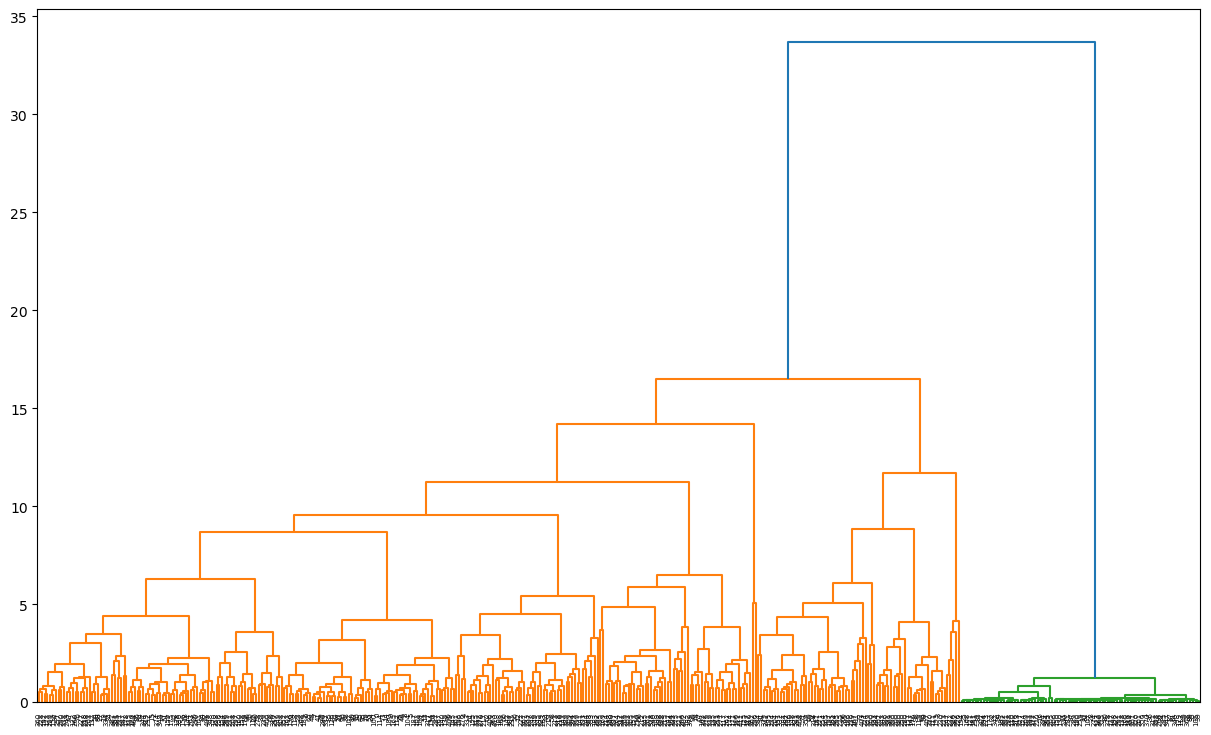

In [35]:
plt.figure(figsize=(15, 9))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.savefig('brunchstory_plot.png')

plt.show()

In [72]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [73]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_label = cluster.fit_predict(list(df['vector']))

# 실루엣 지수 구하기
score = silhouette_score(list(df['vector']), cluster_label)
score

0.45579344

In [74]:
n_cluster = []
s_score = []

for i in tqdm(range(2, 30)):
    cluster = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_label = cluster.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_label)

    n_cluster.append(i)
    s_score.append(score)

100%|██████████| 28/28 [00:00<00:00, 115.24it/s]


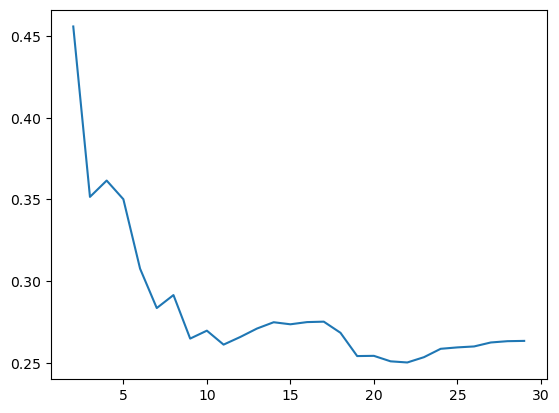

In [75]:
plt.plot(n_cluster, s_score)

In [76]:
result = pd.DataFrame({'n_cluster': n_cluster, 'score': s_score})

In [77]:
result

,n_cluster,score
0,2,0.455793
1,3,0.351562
2,4,0.361546
3,5,0.350128
4,6,0.307667
5,7,0.283562
6,8,0.291509
7,9,0.264885
8,10,0.269735
9,11,0.261196


In [78]:
cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')
cluster_label = cluster.fit_predict(list(df['vector']))

df['cluster'] = cluster_label 

In [79]:
df['cluster'].value_counts()

cluster
0    199
3     85
2     67
5     54
4      5
1      2
Name: count, dtype: int64

In [80]:
# 피클 파일로 저장
import pickle

with open('브런치스토리 클러스터링 결과.pkl', 'wb') as file:
    pickle.dump(df, file)

-----

In [81]:
import pandas as pd
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [82]:
with open('브런치스토리 클러스터링 결과.pkl', 'rb') as file:
    df_cluster = pickle.load(file)

In [83]:
df_cluster

,내용,tagged_review,vector,cluster
1,그토록 기다리고 기다리던 전역을 했다. 전역할 때가 되면 괜히 시원섭섭한 기분이 들...,"[기다리다, 기다리다, 전역, 역할, 시원섭섭하다, 기분, 들다, 마음, 말랑하다,...","[-0.3247903, 0.01287768, -0.23565315, 0.061799...",0
2,오랜만에 만들어 본 장조림 덮밥,"[만, 만들다, 장조림, 덮다, 밥]","[-0.03147805, 0.00068421045, -0.022069683, 0.0...",3
3,일 주일에 두 번씩 내 집에 간다. 식탁 위에 널브러진 물건부터 원래있던 자리를 찾...,"[일, 주일, 두, 번, 집, 간다, 식탁, 위, 널브러진, 물건, 원래, 자리, ...","[-0.38402286, 0.052298207, -0.21957733, 0.0466...",0
4,이렇게 살면 안 되겠구나. 작년 12월 자취 7년 차. 자취라는 이름에 걸맞게 손수...,"[살, 작년, 자취, 차, 자취, 이름, 걸, 맞다, 손수, 밥, 지다, 먹기, 거...","[-0.42138055, 0.11537497, -0.32781625, 0.23239...",2
6,혼자 살고는 싶은데 부모님이랑 살 때 돈을 모아둬야 할 것 같긴 하고.. 주변에서 ...,"[혼자, 살다, 싶다, 부모님, 살, 돈, 모으다, 두다, 주변, 독립, 생각, 친...","[-0.55787927, -0.11287189, -0.477171, 0.134235...",0
...,...,...,...,...
456,사장님의 수행 비서 애초 병원의 계획보다 수술 범위가 적어져 회복이 빨랐던 엄마는 ...,"[사장, 수행, 비서, 애초, 병원, 계획, 수술, 범위, 적어지다, 회복, 빨르다...","[-0.6600475, 0.28502607, -0.26840347, 0.343656...",2
457,2024년 3.8 세계 여성의 날 아침이다. 여성의 날을 축하합니다! 전 세계 여성...,"[세계, 여성, 날, 아침, 여성, 날, 축하, 전, 세계, 여성, 딸, 역사, 속...","[-0.5237541, -0.022894377, -0.29929247, 0.1961...",2
458,당신의 업은 무엇입니까 묻는다면 삶을 읽는다라고 답할 테다. 글 쓰기를 지속할 수 ...,"[업다, 무엇, 입, 묻다, 삶, 읽다, 답, 테, 글, 쓰기, 지속, 이유, 묻다...","[-0.29949012, -0.03754792, -0.32249922, 0.0887...",0
459,서울 출신이 아닌 문과생에게 일자리란 대부분 서울에 몰려 있는 것이었다. 어차피 서...,"[서울, 출신, 문과, 생, 일자리, 란, 대부분, 서울, 몰리다, 어차피, 서울,...","[-0.44621044, -0.08761212, -0.30964106, 0.0570...",0


In [84]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

In [85]:
df_cluster0 = df[df['cluster'] == 0]
df_cluster0

,내용,tagged_review,vector,cluster
1,그토록 기다리고 기다리던 전역을 했다. 전역할 때가 되면 괜히 시원섭섭한 기분이 들...,"[기다리다, 기다리다, 전역, 역할, 시원섭섭하다, 기분, 들다, 마음, 말랑하다,...","[-0.3247903, 0.01287768, -0.23565315, 0.061799...",0
3,일 주일에 두 번씩 내 집에 간다. 식탁 위에 널브러진 물건부터 원래있던 자리를 찾...,"[일, 주일, 두, 번, 집, 간다, 식탁, 위, 널브러진, 물건, 원래, 자리, ...","[-0.38402286, 0.052298207, -0.21957733, 0.0466...",0
6,혼자 살고는 싶은데 부모님이랑 살 때 돈을 모아둬야 할 것 같긴 하고.. 주변에서 ...,"[혼자, 살다, 싶다, 부모님, 살, 돈, 모으다, 두다, 주변, 독립, 생각, 친...","[-0.55787927, -0.11287189, -0.477171, 0.134235...",0
7,혼자 사는 남자라고 하면 생각나는 것들이 있지. 왠지 끼니도 잘 챙기 지 못할 것 ...,"[혼자, 살다, 남자, 생각나다, 끼니, 자다, 챙기다, 지다, 빨래, 대충, 정리...","[-0.400946, 0.027179776, -0.21581955, 0.131324...",0
8,자취를 시작하고 가장 먼저 느끼는 단점은 식사 준비다. 누군가와 함께 살 때는 내가...,"[자취, 시작, 가장, 먼저, 느끼다, 단점, 식사, 준비, 누군가, 살, 요리, ...","[-0.3481202, 0.06299, -0.26086676, 0.1520931, ...",0
...,...,...,...,...
453,처음으로 혼자 살게 된 날. 그 첫날 눈부신 햇살이 생생하다. 이른 가을의 선선한 ...,"[처음, 혼자, 살, 날, 첫날, 눈부시다, 햇살, 생생하다, 이르다, 가을, 선선...","[-0.33629557, 0.08071401, -0.23700693, -0.0335...",0
454,놀이터 1. 아이들이 모여서 놀 수 있도록 시설을 갖추어 따로 마련한 자리. 2. ...,"[놀이터, 아이, 모, 놀, 시설, 갖추다, 마련, 자리, 집단, 모, 즐겁다, 노...","[-0.29108304, 0.003751041, -0.24559262, 0.1104...",0
455,273 번째 에피소드이다. 요새 특강을 가게 되면 이런 말을 자주 반복하는 편이다....,"[에피소드, 요새, 특강, 가게, 이렇다, 말, 자주, 반복, 편이, 앞, 로컬, ...","[-0.447221, 0.0055239536, -0.40987363, 0.06522...",0
458,당신의 업은 무엇입니까 묻는다면 삶을 읽는다라고 답할 테다. 글 쓰기를 지속할 수 ...,"[업다, 무엇, 입, 묻다, 삶, 읽다, 답, 테, 글, 쓰기, 지속, 이유, 묻다...","[-0.29949012, -0.03754792, -0.32249922, 0.0887...",0


In [86]:
all_document = list(df_cluster0['tagged_review'])
dictionary = Dictionary(all_document)

In [87]:
dictionary.token2id

{'가야': 0,
 '가정': 1,
 '각기': 2,
 '간다': 3,
 '개강': 4,
 '개월': 5,
 '거기': 6,
 '걱정': 7,
 '건': 8,
 '걸': 9,
 '걸리다': 10,
 '경제력': 11,
 '경험': 12,
 '고등학생': 13,
 '고민': 14,
 '공간': 15,
 '공부': 16,
 '공존': 17,
 '광활하다': 18,
 '괜찮다': 19,
 '군대': 20,
 '그대로': 21,
 '금전': 22,
 '기다리다': 23,
 '기분': 24,
 '길': 25,
 '꿈': 26,
 '끝': 27,
 '끼': 28,
 '나가다': 29,
 '나이': 30,
 '나중': 31,
 '날': 32,
 '남다': 33,
 '남아나다': 34,
 '내다': 35,
 '내려오다': 36,
 '내쉬다': 37,
 '넘다': 38,
 '노릇': 39,
 '누군가': 40,
 '눈앞': 41,
 '느끼다': 42,
 '늘다': 43,
 '능': 44,
 '다듬다': 45,
 '다르다': 46,
 '다른': 47,
 '단점': 48,
 '단체': 49,
 '닿다': 50,
 '대학생': 51,
 '더': 52,
 '데': 53,
 '돈': 54,
 '드러나다': 55,
 '들다': 56,
 '들이다': 57,
 '따라서': 58,
 '때문': 59,
 '뜨다': 60,
 '라면': 61,
 '루틴': 62,
 '마등': 63,
 '마음': 64,
 '마트': 65,
 '만들기': 66,
 '만들다': 67,
 '만만하다': 68,
 '말': 69,
 '말랑하다': 70,
 '망망대해': 71,
 '맞다': 72,
 '맡기다': 73,
 '매일': 74,
 '모든': 75,
 '모르다': 76,
 '몫': 77,
 '몸': 78,
 '무수': 79,
 '무엇': 80,
 '문제': 81,
 '물살': 82,
 '뭍': 83,
 '미소': 84,
 '바다': 85,
 '바라보다': 86,
 '바쁘다': 87,
 '밖': 88,
 '반나절': 8

In [88]:
corpus = []
for doc in all_document:
    corpus.append(dictionary.doc2bow(doc))

In [89]:
topic_num = 3

ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=topic_num, id2word=dictionary)

In [90]:
ldamodel.print_topics(num_words=7)

[(0,
  '0.006*"집" + 0.005*"생각" + 0.005*"사람" + 0.005*"말" + 0.005*"가다" + 0.004*"일" + 0.004*"시간"'),
 (1,
  '0.008*"사람" + 0.007*"말" + 0.007*"집" + 0.007*"생각" + 0.005*"싶다" + 0.005*"시간" + 0.005*"들다"'),
 (2,
  '0.007*"밥" + 0.006*"생각" + 0.006*"집" + 0.005*"사람" + 0.005*"말" + 0.004*"들다" + 0.004*"시간"')]

In [91]:
ldamodel.get_document_topics(corpus)[0]

[(1, 0.63741595), (2, 0.3532373)]

In [92]:
for i in range(len(corpus)):
    print(ldamodel.get_document_topics(corpus)[i])

[(1, 0.6594198), (2, 0.3330122)]
[(1, 0.111502685), (2, 0.887588)]
[(0, 0.6597518), (1, 0.23730549), (2, 0.10294267)]
[(0, 0.19081473), (1, 0.6282306), (2, 0.1809547)]
[(1, 0.91901505), (2, 0.0797551)]
[(1, 0.6595605), (2, 0.33894157)]
[(0, 0.06017114), (1, 0.9237889), (2, 0.016039956)]
[(2, 0.9977748)]
[(0, 0.4216977), (1, 0.5766015)]
[(0, 0.81678945), (2, 0.17947067)]
[(0, 0.012969204), (1, 0.01347003), (2, 0.97356075)]
[(0, 0.24088946), (1, 0.7549753)]
[(1, 0.8492469), (2, 0.14932227)]
[(0, 0.94118625), (1, 0.040585022), (2, 0.01822873)]
[(1, 0.99356437)]
[(1, 0.99104255)]
[(1, 0.98262465), (2, 0.016563173)]
[(2, 0.99709266)]
[(1, 0.9877338)]
[(0, 0.087608576), (1, 0.05891964), (2, 0.85347176)]
[(2, 0.99823546)]
[(0, 0.13077874), (1, 0.6114218), (2, 0.25779942)]
[(0, 0.7602092), (1, 0.23692995)]
[(2, 0.99267846)]
[(0, 0.031783238), (1, 0.96186805)]
[(0, 0.09957879), (1, 0.8992306)]
[(1, 0.99644536)]
[(0, 0.09691865), (2, 0.9007744)]
[(1, 0.99066806)]
[(0, 0.104300424), (1, 0.2956415

In [93]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

In [94]:
perplex_score = ldamodel.log_perplexity(corpus)

In [95]:
perplex_score

-8.334481537964077

In [96]:
coherence_model = CoherenceModel(model = ldamodel, texts = all_document, dictionary=dictionary, topn=3)

In [97]:
coherence_model.get_coherence()

0.5738349005725304

In [98]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary)
    perp_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perp_v)

Text(0, 0.5, 'Perplexity score')

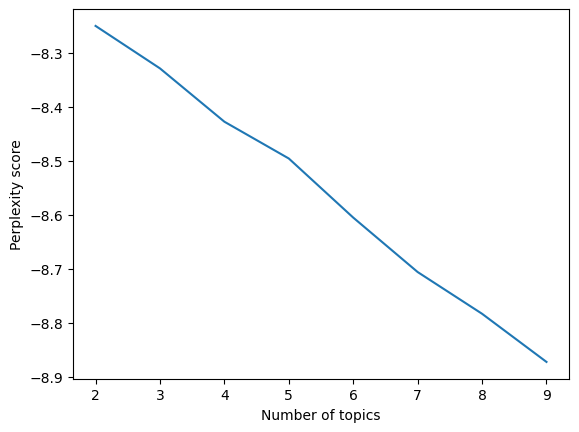

In [99]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [65]:
coherence_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model = ldamodel, texts = all_document, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

Text(0, 0.5, 'Coherence score')

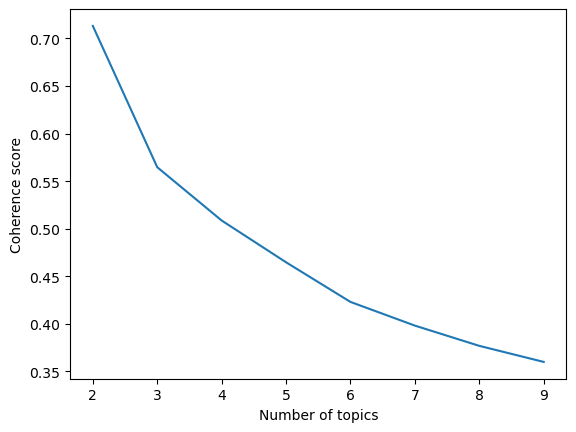

In [66]:
x = range(2,10)

plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [67]:
topic_n = 6
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic_n, id2word=dictionary, random_state=1, passes=5)

In [68]:
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []

    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

100%|██████████| 67/67 [00:00<00:00, 1514.25it/s]


In [69]:
df_cluster0['action_cluster'] = action_align

In [70]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [71]:
predpared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(predpared_data, 'brunchstory 클러스터링.html')
pyLDAvis.display(predpared_data)